<a href="https://colab.research.google.com/github/vedrajiit/GoogleCollab/blob/main/MachineLearningLifeCycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# @title Default title text
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

#1. Data collection
#Load dataset iris
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

#Map taget to species names
data['species'] = data['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
#2. Data cleaning
#Check missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [9]:
#Summary statistics
print("\nSummary statistics:\n", data.describe())


Summary statistics:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


Data Visualization

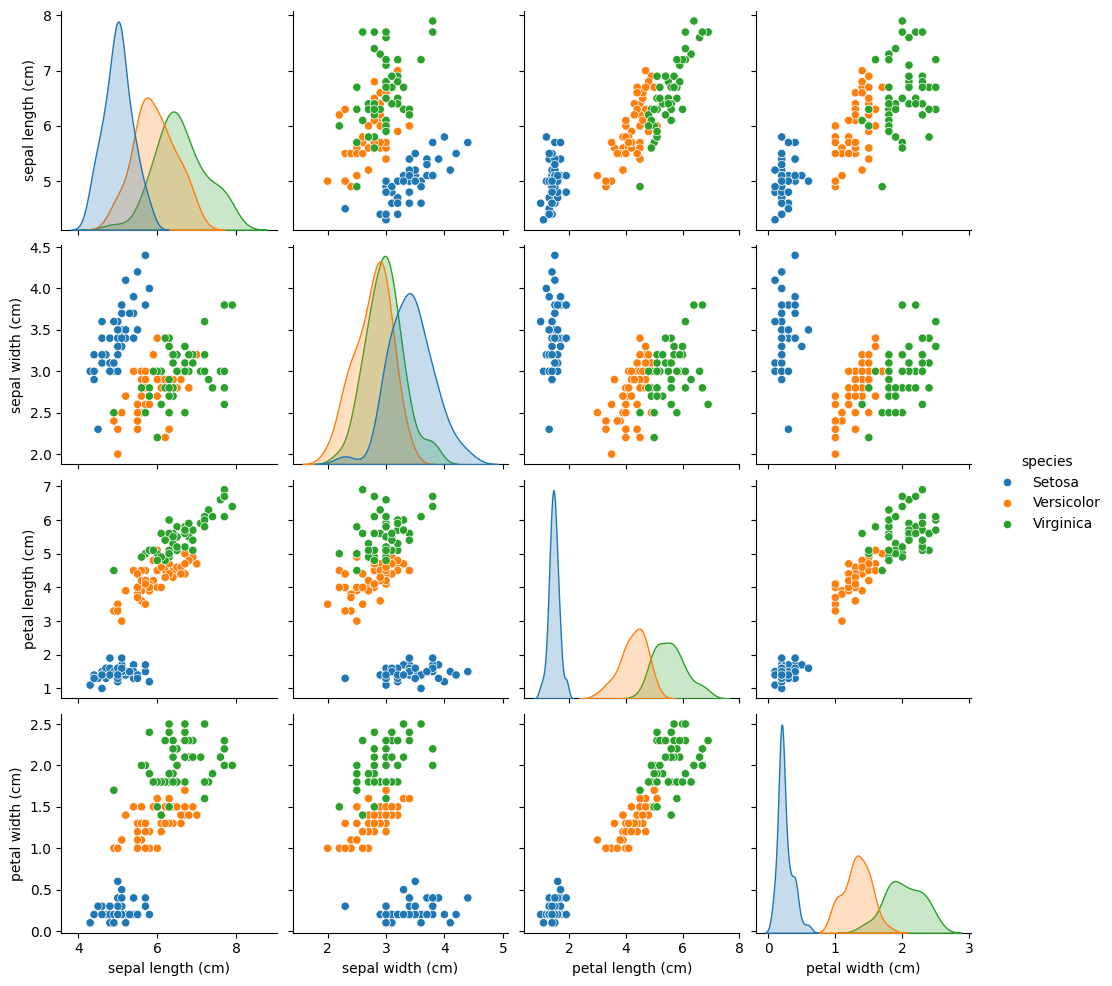

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
#Visulization features relationships
sns.pairplot(data, hue='species')
plt.show()

for col in iris.feature_names:
  plt.figure()
  #sns.boxplot(data=data, x='species', y=col)
  #plt.title(f'Box plot of {col}')
  plt.show()

Data Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler
#separate feature and targets
X = data[iris.feature_names]
Y = data['species']

#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Model design and selection

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

#split data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=2025) #stratify=y

#initiate and train default SVC
svc = SVC()
svc.fit(X_train, Y_train)

#predict and evaluate
Y_pred = svc.predict(X_test)
print("\nDefault SVC performace:")
print(classification_report(Y_test, Y_pred))

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2f}")


Default SVC performace:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      0.92      0.96        12
   Virginica       0.94      1.00      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy: 0.98


Hyperparameter tuning

In [15]:
#Hyperparameter tuning
param_grid = {'C': [0.1,1.0,10], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1.0, 10], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [16]:
#Best model evaluation
best_svc = grid_search.best_estimator_
Y_pred_best = best_svc.predict(X_test)

print("\nTuned SVC performance:")
print(classification_report(Y_test, Y_pred_best))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_best):.2f}")


Tuned SVC performance:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        17
  Versicolor       1.00      0.83      0.91        12
   Virginica       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.94      0.95        45
weighted avg       0.96      0.96      0.95        45

Accuracy: 0.96
